In [2]:
! pip install plotly --upgrade

     |████████████████████████████████| 28.8 MB 6.6 MB/s eta 0:00:01


In [9]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import pandas as pd
import os

In [4]:
def read_dset(fpath, dset_name):

    df = pd.read_csv(fpath, index_col=False)
    df.columns = ['model', dset_name]
    
    return df

In [5]:
chexpert = read_dset('few-shot/chexpert.csv', 'CheXpert')
chestx = read_dset('few-shot/chestx.csv', 'ChestXray8').drop(labels='model', axis=1)
diabetic_retinopathy = read_dset('few-shot/diabetic_retinopathy.csv', 'EyePACS').drop(labels='model', axis=1)
shenzhen = read_dset('few-shot/shenzhencxr.csv', 'Shenzhen').drop(labels='model', axis=1)
montgomery = read_dset('few-shot/montgomerycxr.csv', 'Montgomery').drop(labels='model', axis=1)
ichallenge_amd = read_dset('few-shot/ichallenge_amd.csv', 'iChallenge-AMD').drop(labels='model', axis=1)
ichallenge_pm = read_dset('few-shot/ichallenge_pm.csv', 'iChallenge-PM').drop(labels='model', axis=1)
bach = read_dset('few-shot/bach.csv', 'BACH').drop(labels='model', axis=1)

In [6]:
diabetic_retinopathy = diabetic_retinopathy.EyePACS.mul(2.5)
diabetic_retinopathy = diabetic_retinopathy.to_frame()

chestx = chestx.ChestXray8.mul(2.5)
chestx = chestx.to_frame()

In [7]:
fewshot_df = pd.concat([chexpert, chestx, shenzhen, montgomery, diabetic_retinopathy, ichallenge_amd, ichallenge_pm, bach], axis=1)
fewshot_df = fewshot_df.transpose()
new_header = fewshot_df.iloc[0]
fewshot_df = fewshot_df[1:]
fewshot_df.columns = new_header
fewshot_df.reset_index(inplace=True)
fewshot_df

model,index,simclr-v1,moco-v2,swav,byol,pirl,supervised_r50,supervised_r18,supervised_d121,mimic-chexpert,moco-cxr,NaN,NaN,NaN
0,CheXpert,75.01,74.94,74.97,74.61,74.2,73.47,71.43,72.5,77.28,74.76,NaN,NaN,NaN
1,ChestXray8,74.65,71.725,69.4,75.7,71.3,69.275,71.45,69.7,84.325,86.975,87.05,65.375,72.525
2,Shenzhen,74.46,73.76,75.22,76.29,77.48,70.86,74.16,74.98,69.08,73.22,68.62,73.89,67.69
3,Montgomery,63.2,63.54,67.38,70.98,63.58,62.31,62.94,65.31,69.15,67.54,67.13,57.25,65.02
4,EyePACS,81.95,85.175,86.175,84.15,85.475,78.3,82.4,83.725,56.4,64.275,55.575,60.675,69.45
5,iChallenge-AMD,74.9,74.91,70.94,74.58,75.26,75.7,74.59,77.12,62.72,62.87,65.05,60.08,68.17
6,iChallenge-PM,94.92,94.21,94.69,95.83,93.49,94.8,93.68,94.86,78.84,83.66,76.9,79.06,87.59
7,BACH,80.61,82.53,82.78,83.28,81.02,80.49,80.78,81.21,66.86,69.66,71.6,66.96,69.07


In [22]:
# Bar charts - simclr-v1
def bar_charts(model_name):
    fig, ax = plt.subplots()
    data_index = fewshot_df['index']
    simclr_v1_val = fewshot_df[model_name]
    # simclr_v1_val = fewshot_df['simclr-v1']

    colours = ['b','g', 'r', 'c', 'm', 'y', 'k', 'chocolate']
    ax.barh(data_index, simclr_v1_val, align='center', color=colours, alpha =0.5)
    ax.set_yticks(data_index)
    ax.invert_yaxis()
    ax.set_xlabel('Performance')
    ax.set_title(model_name)
    plt.show()

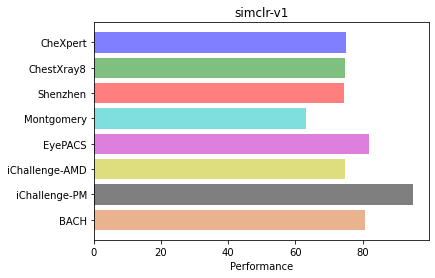

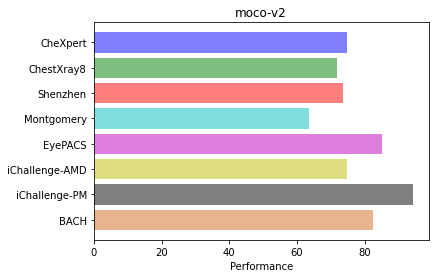

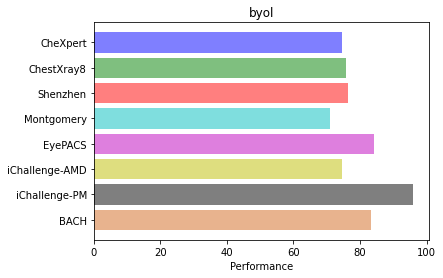

In [24]:
bar_charts('simclr-v1')
bar_charts('moco-v2')
bar_charts('byol')

In [10]:
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
    r = fewshot_df['simclr-v1'], 
    theta = fewshot_df['index'],
    fill='toself',
    name='SimCLR-v1',
    fillcolor='red',
    opacity=0.2,
    marker_color='red',
))
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=False,
      range=[50, 100],
    ),
  ),
  showlegend=True,
)

fig.show()
# fig.write_image('radar_plots/simclr.png')

In [12]:
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
    r = fewshot_df['moco-v2'], 
    theta = fewshot_df['index'],
    fill='toself',
    name='MoCo-v2',
    fillcolor='blue',
    opacity=0.3,
    marker_color='blue',
))
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=False,
      range=[50, 100],
    ),
  ),
  showlegend=True,
)

# fig.write_image('radar_plots/moco.png')

In [16]:
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
    r = fewshot_df['byol'], 
    theta = fewshot_df['index'],
    fill='toself',
    name='BYOL',
    fillcolor='orange',
    opacity=0.5,
    marker_color='orange',
))
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=False,
      range=[50, 100],
    ),
  ),
  showlegend=True,
)

fig.write_image('radar_plots/byol.png')

In [18]:
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
    r = fewshot_df['pirl'], 
    theta = fewshot_df['index'],
    fill='toself',
    name='PIRL',
    fillcolor='purple',
    opacity=0.3,
    marker_color='purple',
))
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=False,
      range=[50, 100],
    ),
  ),
  showlegend=True,
)

fig.write_image('radar_plots/pirl.png')

In [23]:
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
    r = fewshot_df['mimic-chexpert'], 
    theta = fewshot_df['index'],
    fill='toself',
    name='MIMIC-CheXpert',
    fillcolor='aqua',
    opacity=0.4,
    marker_color='aqua',
))
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=False,
      range=[50, 100],
    ),
  ),
  showlegend=True,
)

fig.write_image('radar_plots/mimic_chexpert.png')

In [24]:
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
    r = fewshot_df['moco-cxr'], 
    theta = fewshot_df['index'],
    fill='toself',
    name='MoCo-CXR',
    fillcolor='red',
    opacity=0.4,
    marker_color='red',
))
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=False,
      range=[50, 100],
    ),
  ),
  showlegend=True,
)

fig.write_image('radar_plots/moco_cxr.png')

In [24]:
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
    r = fewshot_df['byol'], 
    theta = fewshot_df['index'],
    fill='toself',
    name='BYOL',
    fillcolor='blue',
    opacity=0.4,
    marker_color='blue',
))
fig.add_trace(go.Scatterpolar(
    r = fewshot_df['supervised_d121'], 
    theta = fewshot_df['index'],
    fill='toself',
    name='Supervised d121',
    fillcolor='green',
    opacity=0.3,
    marker_color='green',
))
fig.add_trace(go.Scatterpolar(
    r = fewshot_df['mimic-chexpert'], 
    theta = fewshot_df['index'],
    fill='toself',
    name='MIMIC-CheXpert',
    fillcolor='red',
    opacity=0.5,
    marker_color='red',
))
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=False,
      range=[50, 100],
    ),
  ),
  showlegend=True,
)
fig.show()
fig.write_image('radar_plots/combined.png')